In [1]:
import numpy as np
import pandas as pd

train_csv = pd.read_csv('train.csv')
test_csv = pd.read_csv('test.csv')
test_csv['Survived'] = np.NaN
all_csv = pd.concat([train_csv, test_csv])
all_csv.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0.0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0.0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [2]:
survived = train_csv[train_csv['Survived'] == 1]
print(f'{len(survived)} / {len(train_csv)} : {(len(survived) / len(train_csv)):0.2%}')

342 / 891 : 38.38%


In [3]:
all_csv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [4]:
all_csv.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [5]:
import plotly.express as px
from sklearn.preprocessing import StandardScaler

num_features = ['Age', 'Fare', 'Parch', 'SibSp']
all_num_data = all_csv[num_features]

for column in all_num_data.columns:
    std_scaler = StandardScaler()
    data = all_num_data[[column]]
    std_scaler.fit(np.log(data + 1))
    tr_data = std_scaler.transform(np.log(data + 1))
    fig = px.histogram(data, title=f'{column}')
    fig.show()
    fig = px.histogram(tr_data, title=f'norm_{column}')
    fig.show()


/home/aleksey/.local/lib/python3.8/site-packages/scipy/__init__.py:143: UserWarning: A NumPy version >=1.19.5 and <1.27.0 is required for this version of SciPy (detected version 1.19.0)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [6]:
correlations = all_num_data.corr()
px.imshow(correlations, text_auto=True)

In [7]:
correlations = train_csv[num_features + ['Survived']].corr()
px.imshow(correlations, text_auto=True)

In [8]:
pd.pivot_table(train_csv, values=num_features, index='Survived')

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


In [9]:
for column in all_csv.columns:
    vc = all_csv[column].value_counts()
    fig = px.bar(vc, title=column)
    fig.show()

In [10]:
print(pd.pivot_table(train_csv, values='Name', columns='Pclass', index='Survived', aggfunc ='count'))
print()
print(pd.pivot_table(train_csv, values='Name', columns='Sex', index='Survived', aggfunc ='count'))
print()
print(pd.pivot_table(train_csv, values='Name', columns='Embarked', index='Survived', aggfunc ='count'))
print()

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119

Sex       female  male
Survived              
0             81   468
1            233   109

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217



In [11]:
def get_name_status(name: str) -> str:
    return name.split(',')[1].split('.')[0].strip()
    
all_csv['name_status'] = all_csv.Name.apply(get_name_status)
print(pd.pivot_table(all_csv, values='Name', columns='name_status', index='Survived', aggfunc='count'))

name_status  Capt  Col  Don   Dr  Jonkheer  Lady  Major  Master   Miss  Mlle  \
Survived                                                                       
0.0           1.0  1.0  1.0  4.0       1.0   NaN    1.0    17.0   55.0   NaN   
1.0           NaN  1.0  NaN  3.0       NaN   1.0    1.0    23.0  127.0   2.0   

name_status  Mme     Mr   Mrs   Ms  Rev  Sir  the Countess  
Survived                                                    
0.0          NaN  436.0  26.0  NaN  6.0  NaN           NaN  
1.0          1.0   81.0  99.0  1.0  NaN  1.0           1.0  


In [12]:
def get_cabin_count(cabin: str) -> int:
    return len(cabin.split(' ')) if cabin is not np.nan else np.nan

all_csv['cabin_count'] = all_csv.Cabin.apply(get_cabin_count)
print(pd.pivot_table(all_csv, values='Name', columns='cabin_count', index='Survived', aggfunc='count'))
print(f"Median: {all_csv.cabin_count.median()}")

cabin_count    1.0  2.0  3.0  4.0
Survived                         
0.0           58.0  7.0  3.0  NaN
1.0          122.0  9.0  3.0  2.0
Median: 1.0


In [13]:
def get_cabin_class(cabin: str) -> int:
    if cabin is np.nan:
        return np.nan
    return cabin.split(' ')[0][0]

all_csv['cabin_class'] = all_csv.Cabin.apply(get_cabin_class)
print(pd.pivot_table(all_csv, values='Name', columns='cabin_class', index='Survived', aggfunc='count'))
print(all_csv.cabin_class.value_counts())

cabin_class    A     B     C     D     E    F    G    T
Survived                                               
0.0          8.0  12.0  24.0   8.0   8.0  5.0  2.0  1.0
1.0          7.0  35.0  35.0  25.0  24.0  8.0  2.0  NaN
C    94
B    65
D    46
E    41
A    22
F    21
G     5
T     1
Name: cabin_class, dtype: int64


In [14]:
def get_cabin_number(cabin: str) -> int:
    if cabin is np.nan:
        return np.nan
    try:
        return int(cabin.split(' ')[0][1:])
    except ValueError:
        return np.nan

all_csv['cabin_number'] = all_csv.Cabin.apply(get_cabin_number)
print(pd.pivot_table(all_csv, values='Name', columns='cabin_number', index='Survived', aggfunc='count'))

cabin_number  2.0    3.0    4.0    5.0    6.0    7.0    8.0    9.0    10.0   \
Survived                                                                      
0.0             2.0    NaN    NaN    1.0    3.0    1.0    NaN    NaN    1.0   
1.0             3.0    1.0    3.0    2.0    3.0    2.0    2.0    1.0    2.0   

cabin_number  11.0   ...  110.0  111.0  118.0  121.0  123.0  124.0  125.0  \
Survived             ...                                                    
0.0             NaN  ...    1.0    1.0    1.0    NaN    1.0    2.0    NaN   
1.0             1.0  ...    NaN    NaN    NaN    2.0    1.0    NaN    2.0   

cabin_number  126.0  128.0  148.0  
Survived                           
0.0             NaN    1.0    NaN  
1.0             2.0    NaN    1.0  

[2 rows x 92 columns]


In [15]:
def get_ticket_type(ticket: str) -> int:
    if ticket is np.nan:
        print('Nan found')
    ticket_parts = ticket.split(' ')
    if len(ticket_parts) == 1:
        return 'num'
    ticket_type = ticket_parts[0].replace('.', '').split('/')[0].lower()
    return ticket_type

all_csv['ticket_type'] = all_csv.Ticket.apply(get_ticket_type)
print(pd.pivot_table(all_csv, values='Name', columns='ticket_type', index='Survived', aggfunc='count'))

ticket_type     a   a4   a5    c    ca   fa   fc  fcc    num    p  ...   so  \
Survived                                                           ...        
0.0          24.0  1.0  2.0  3.0  28.0  1.0  1.0  1.0  410.0  1.0  ...  3.0   
1.0           2.0  NaN  NaN  2.0  14.0  NaN  NaN  4.0  255.0  1.0  ...  1.0   

ticket_type  soc  sop  soton   sp  ston   sw    w   we  wep  
Survived                                                     
0.0          5.0  1.0   15.0  1.0  10.0  NaN  9.0  1.0  1.0  
1.0          NaN  NaN    2.0  NaN   8.0  2.0  1.0  1.0  NaN  

[2 rows x 24 columns]


In [16]:
all_csv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   1309 non-null   int64  
 1   Survived      891 non-null    float64
 2   Pclass        1309 non-null   int64  
 3   Name          1309 non-null   object 
 4   Sex           1309 non-null   object 
 5   Age           1046 non-null   float64
 6   SibSp         1309 non-null   int64  
 7   Parch         1309 non-null   int64  
 8   Ticket        1309 non-null   object 
 9   Fare          1308 non-null   float64
 10  Cabin         295 non-null    object 
 11  Embarked      1307 non-null   object 
 12  name_status   1309 non-null   object 
 13  cabin_count   295 non-null    float64
 14  cabin_class   295 non-null    object 
 15  cabin_number  282 non-null    float64
 16  ticket_type   1309 non-null   object 
dtypes: float64(5), int64(4), object(8)
memory usage: 184.1+ KB


<h3>A data preparation for the model</h3>

Train / val amounts: 711 / 178


,Age,log_Fare,SibSp,Parch,cabin_count,Pclass,Embarked,Sex,name_status,cabin_class,ticket_type,Survived
674,-0.130575,-3.076956,-0.479087,-0.445000,-0.358056,2,S,male,Mr,C,num,0
192,-0.755288,-0.824662,0.481288,-0.445000,-0.358056,3,S,female,Miss,C,num,1
288,0.841202,-0.351496,-0.479087,-0.445000,-0.358056,2,S,male,Mr,C,num,1
125,-1.241177,-0.490100,0.481288,-0.445000,-0.358056,3,C,male,Master,C,num,1
752,0.216488,-0.648597,-0.479087,-0.445000,-0.358056,3,S,male,Mr,C,num,0
488,0.008251,-0.802073,-0.479087,-0.445000,-0.358056,3,S,male,Mr,C,a5,0
648,-0.130575,-0.860767,-0.479087,-0.445000,-0.358056,3,S,male,Mr,C,so,0
845,0.841202,-0.860767,-0.479087,-0.445000,-0.358056,3,S,male,Mr,C,ca,0
97,-0.477638,1.223854,-0.479087,0.710763,1.373527,1,C,male,Mr,D,pc,1
843,0.320607,-1.004728,-0.479087,-0.445000,-0.358056,3,C,male,Mr,C,num,0


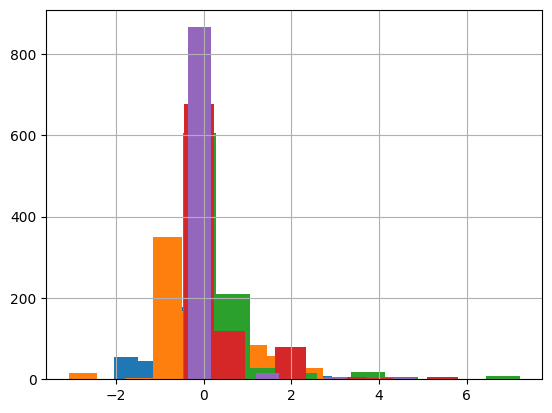

In [17]:
from sklearn.model_selection import train_test_split

num_features = ['Age', 'log_Fare', 'SibSp', 'Parch', 'cabin_count']
cat_features = ['Pclass', 'Embarked', 'Sex', 'name_status', 'cabin_class', 'ticket_type']
features = num_features + cat_features

train_csv.Age = train_csv.Age.fillna(all_csv.Age.median())
train_csv.Fare = train_csv.Fare.fillna(all_csv.Fare.median())

train_csv['log_Fare'] = np.log(train_csv.Fare + 1)

train_csv.dropna(subset=['Embarked'], inplace = True)

train_csv.Pclass = train_csv.Pclass.astype(str)

train_csv['name_status'] = train_csv.Name.apply(get_name_status)
train_csv['ticket_type'] = train_csv.Ticket.apply(get_ticket_type)
train_csv['cabin_count'] = train_csv.Cabin.apply(get_cabin_count)
train_csv.cabin_count = train_csv.cabin_count.fillna(1)
train_csv['cabin_class'] = train_csv.Cabin.apply(get_cabin_class)
train_csv.cabin_class = train_csv.cabin_class.fillna('C')

all_csv['log_Fare'] = np.log(all_csv.Fare + 1)

std_scaler = StandardScaler()
std_scaler.fit(all_csv[num_features])
train_csv[num_features] = std_scaler.transform(train_csv[num_features])

for f in num_features:
    train_csv[f].hist()

train_data, val_data = train_test_split(train_csv[features + ['Survived']], test_size=0.2)
print(f'Train / val amounts: {len(train_data)} / {len(val_data)}')

train_data.head(10)

In [18]:
females = val_data.loc[val_data.Sex == 'female']
print(f'Assumption: only women have survied, accuracy: {sum(females["Survived"]) / len(val_data) * 100:.2f}%')

Assumption: only women have survied, accuracy: 22.47%


In [19]:
def get_accuracy(pr_values, y_values):
    return np.sum(np.array(pr_values) == np.array(y_values)) / len(pr_values)

def merge_dummies(dummy_a: pd.DataFrame, dummy_b: pd.DataFrame):
    columns_a = set(dummy_a.columns)
    columns_b = set(dummy_b.columns)
    common_columns_set = columns_a.intersection(columns_b)
    for column in columns_a:
        if column not in common_columns_set:
            dummy_a.drop(columns=[column], inplace=True)
    for column in columns_b:
        if column not in common_columns_set:
            dummy_b.drop(columns=[column], inplace=True)
    dummy_a.sort_index(axis=1, inplace=True)
    dummy_b.sort_index(axis=1, inplace=True)
    

y_train = train_data["Survived"]
y_val = val_data["Survived"]

x_train = pd.get_dummies(train_data[features])
x_val = pd.get_dummies(val_data[features])

x_train.drop(columns=['Sex_male'], inplace=True)
x_val.drop(columns=['Sex_male'], inplace=True)

merge_dummies(x_train, x_val)

<h3> A computing of the model </h3>

In [20]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from tqdm import tqdm
import time


random_grid = {'n_estimators': [int(x) for x in np.linspace(1, 300, num=50)],
               'max_features': [None, 'sqrt'],
               'max_depth': [int(x) for x in np.linspace(1, 110, num=20)] + [None],
               'min_samples_split': [2, 5, 10],
               'min_samples_leaf': [1, 2, 4],
               'bootstrap': [True]}
best_rf_model = None
best_acc = 0.0
best_params = None

# best_rf_model = RandomForestClassifier(n_estimators=10, max_depth=6, random_state=3)
# best_rf_model.fit(x_train, y_train)

for _ in tqdm(range(500)):
    params = {k: np.random.choice(v) for k, v in random_grid.items()}
    rf_model = RandomForestClassifier(**params, random_state=3)
    rf_model.fit(x_train, y_train)
    pr_val = rf_model.predict(x_val)
    accuracy = get_accuracy(pr_val, y_val)
    if best_rf_model is None or accuracy > best_acc:
        best_rf_model = rf_model
        best_acc = accuracy
        best_params = params

time.sleep(1)
print()
print(f'Best params: {best_params}')

pr_train = best_rf_model.predict(x_train)
pr_val = best_rf_model.predict(x_val)

train_accuracy = get_accuracy(pr_train, y_train)
val_accuracy = get_accuracy(pr_val, y_val)
print(f'Train accuracy: {train_accuracy * 100:.2f}%, Val accuracy: {val_accuracy * 100:.2f}%')

100%|██████████| 500/500 [02:03<00:00,  4.04it/s]



Best params: {'n_estimators': 43, 'max_features': None, 'max_depth': 6, 'min_samples_split': 2, 'min_samples_leaf': 1, 'bootstrap': True}
Train accuracy: 91.56%, Val accuracy: 84.27%


In [21]:
import lightgbm as lgb


lgb_train = lgb.Dataset(x_train, y_train)
lgb_eval = lgb.Dataset(x_val, y_val, reference=lgb_train)

best_gbm = None
best_acc = 0
best_params = None

random_grid = {'n_estimators': [int(x) for x in np.linspace(1, 300, num=50)],
               'num_leaves': [i for i in range(2, 100, 3)],
               'objective': ['xentropy', 'binary'],
               'max_depth': [int(x) for x in np.linspace(1, 110, num=20)] + [-1],
               'learning_rate': [float(lr) for lr in np.linspace(0.01, 0.3, num=10)],
               'boosting_type': ['gbdt', 'dart']}

for _ in tqdm(range(500)):
    params = {k: np.random.choice(v) for k, v in random_grid.items()}
    gbm = lgb.LGBMClassifier(**params, random_state=3, verbose=-1)
    gbm.fit(x_train, y_train)
    pr_val = gbm.predict(x_val)
    accuracy = get_accuracy(pr_val, y_val)
    if best_gbm is None or accuracy > best_acc:
        best_gbm = gbm
        best_acc = accuracy
        best_params = params

time.sleep(1)
print()
print(f'Best params: {best_params}')

threshold = 0.5
pr_train = best_gbm.predict(x_train)
pr_train[pr_train < threshold] = 0
pr_train[pr_train > 0] = 1
pr_train = pr_train.astype(int)
pr_val = best_gbm.predict(x_val)
pr_val[pr_val < threshold] = 0
pr_val[pr_val > 0] = 1
pr_val = pr_val.astype(int)

train_accuracy = get_accuracy(pr_train, y_train)
val_accuracy = get_accuracy(pr_val, y_val)
print(f'Train accuracy: {train_accuracy * 100:.2f}%, Val accuracy: {val_accuracy * 100:.2f}%')

/usr/lib/python3/dist-packages/dask/dataframe/utils.py:14: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.

/usr/lib/python3/dist-packages/dask/dataframe/utils.py:362: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.

/usr/lib/python3/dist-packages/dask/dataframe/utils.py:362: FutureWarning:

pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.

/usr/lib/python3/dist-packages/dask/dataframe/utils.py:362: FutureWarning:

pandas.UInt64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.

100%|██████████| 500/500 [00:41<00:00, 11.97it/s]



Best params: {'n_estimators': 129, 'num_leaves': 62, 'objective': 'xentropy', 'max_depth': 6, 'learning_rate': 0.20333333333333334, 'boosting_type': 'dart'}
Train accuracy: 91.84%, Val accuracy: 84.27%


In [22]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from tqdm import tqdm


random_grid = {'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']}
best_et_model = None
best_acc = 0.0
best_params = None

# best_rf_model = RandomForestClassifier(n_estimators=10, max_depth=6, random_state=3)
# best_rf_model.fit(x_train, y_train)

for _ in tqdm(range(500)):
    params = {k: np.random.choice(v) for k, v in random_grid.items()}
    et_model = LogisticRegression(**params, max_iter=1000)
    et_model.fit(x_train, y_train)
    pr_val = et_model.predict(x_val)
    accuracy = get_accuracy(pr_val, y_val)
    if best_et_model is None or accuracy > best_acc:
        best_et_model = rf_model
        best_acc = accuracy
        best_params = params

time.sleep(1)
print()
print(f'Best params: {best_params}')

pr_train = best_et_model.predict(x_train)
pr_val = best_et_model.predict(x_val)

train_accuracy = get_accuracy(pr_train, y_train)
val_accuracy = get_accuracy(pr_val, y_val)
print(f'Train accuracy: {train_accuracy * 100:.2f}%, Val accuracy: {val_accuracy * 100:.2f}%')

100%|██████████| 500/500 [00:12<00:00, 39.09it/s]



Best params: {'solver': 'liblinear'}
Train accuracy: 92.97%, Val accuracy: 82.58%


In [23]:
from sklearn.ensemble import VotingClassifier

final_model = VotingClassifier(estimators=[('rf', best_rf_model), ('gbm', best_gbm),
                                           ('et', best_et_model)], voting='soft')

final_model.fit(x_train, y_train)

pr_train = final_model.predict(x_train)
pr_val = final_model.predict(x_val)

train_accuracy = get_accuracy(pr_train, y_train)
val_accuracy = get_accuracy(pr_val, y_val)
print(f'Train accuracy: {train_accuracy * 100:.2f}%, Val accuracy: {val_accuracy * 100:.2f}%')

Train accuracy: 92.97%, Val accuracy: 83.71%


<h3> Final calculations</h3>

In [24]:
x_all = pd.get_dummies(train_csv[features])
x_all.drop(columns=['Sex_male'], inplace=True)
x_all.sort_index(axis=1, inplace=True)

y_all = train_csv['Survived']

test_csv.Age = test_csv.Age.fillna(all_csv.Age.median())
test_csv.Fare = test_csv.Fare.fillna(all_csv.Fare.median())

test_csv['log_Fare'] = np.log(test_csv.Fare + 1)

test_csv.dropna(subset=['Embarked'], inplace=True)

test_csv.Pclass = test_csv.Pclass.astype(str)

test_csv['name_status'] = test_csv.Name.apply(get_name_status)
test_csv['ticket_type'] = test_csv.Ticket.apply(get_ticket_type)
test_csv['cabin_count'] = test_csv.Cabin.apply(get_cabin_count)
test_csv.cabin_count = test_csv.cabin_count.fillna(1)
test_csv['cabin_class'] = test_csv.Cabin.apply(get_cabin_class)
test_csv.cabin_class = test_csv.cabin_class.fillna('C')

test_csv[num_features] = std_scaler.transform(test_csv[num_features])

x_test = pd.get_dummies(test_csv[features])
x_test.drop(columns=['Sex_male'], inplace=True)

merge_dummies(x_all, x_test)

final_model.fit(x_all, y_all)

pr_all = final_model.predict(x_all)
all_accuracy = get_accuracy(pr_all, y_all)
print(f'Accuracy : {all_accuracy * 100:.2f}%')

pr_s = final_model.predict(x_test)
out_s = pd.DataFrame({
        "PassengerId": test_csv.PassengerId,
        "Survived": pr_s
    })
out_s.to_csv('submission.csv', index=False)
out_s.head(30)

Accuracy : 91.23%


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,0
7,899,0
8,900,1
9,901,0


<h2> There is 75% accuracy on the test subset </h2>